# Mistral 7B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\mistral7b"
prompt_approaches = os.listdir(base_output_dir)

Processing sarvari_aggregation...
Model Name: Mistral, Task: aki, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: miiv, Timestamp: 20250623_184546
Preparing data for Mistral PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
✓ Required columns present: True
✓ Target Label is binary: True
✓ Predicted Diagnosis is binary: True
✓ Predicted Probability in [0,1]: True
✓ No invalid predictions 

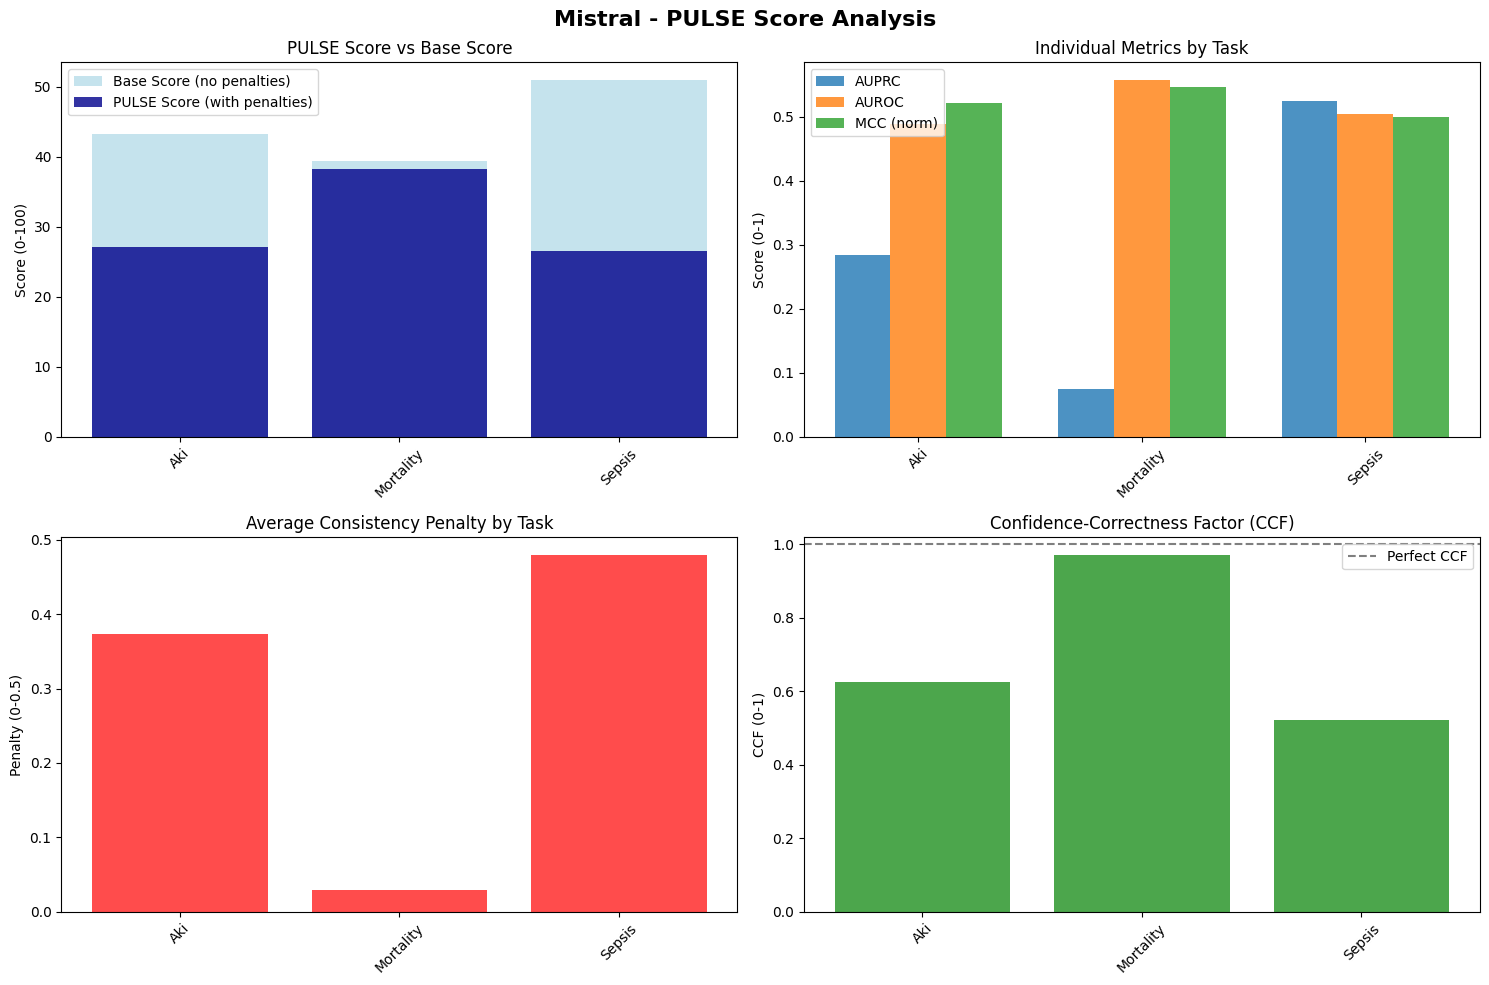

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 30.61/100
📈 Performance Category: Poor performance with significant confidence problems

📊 AKI Analysis:
   • Base performance: 43.2/100
   • Final PULSE score: 27.1/100
   • Penalty impact: -16.2 points
   • Problematic predictions: 2427 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 39.4/100
   • Final PULSE score: 38.2/100
   • Penalty impact: -1.1 points
   • Problematic predictions: 21 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 51.0/100
   • Final PULSE score: 26.5/100
   • Penalty impact: -24.4 points
   • Problematic predictions: 2939 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -13.9 points per task
   • This indicates significant issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 26.5/100
   • Mortality prediction: 38.2/100
  

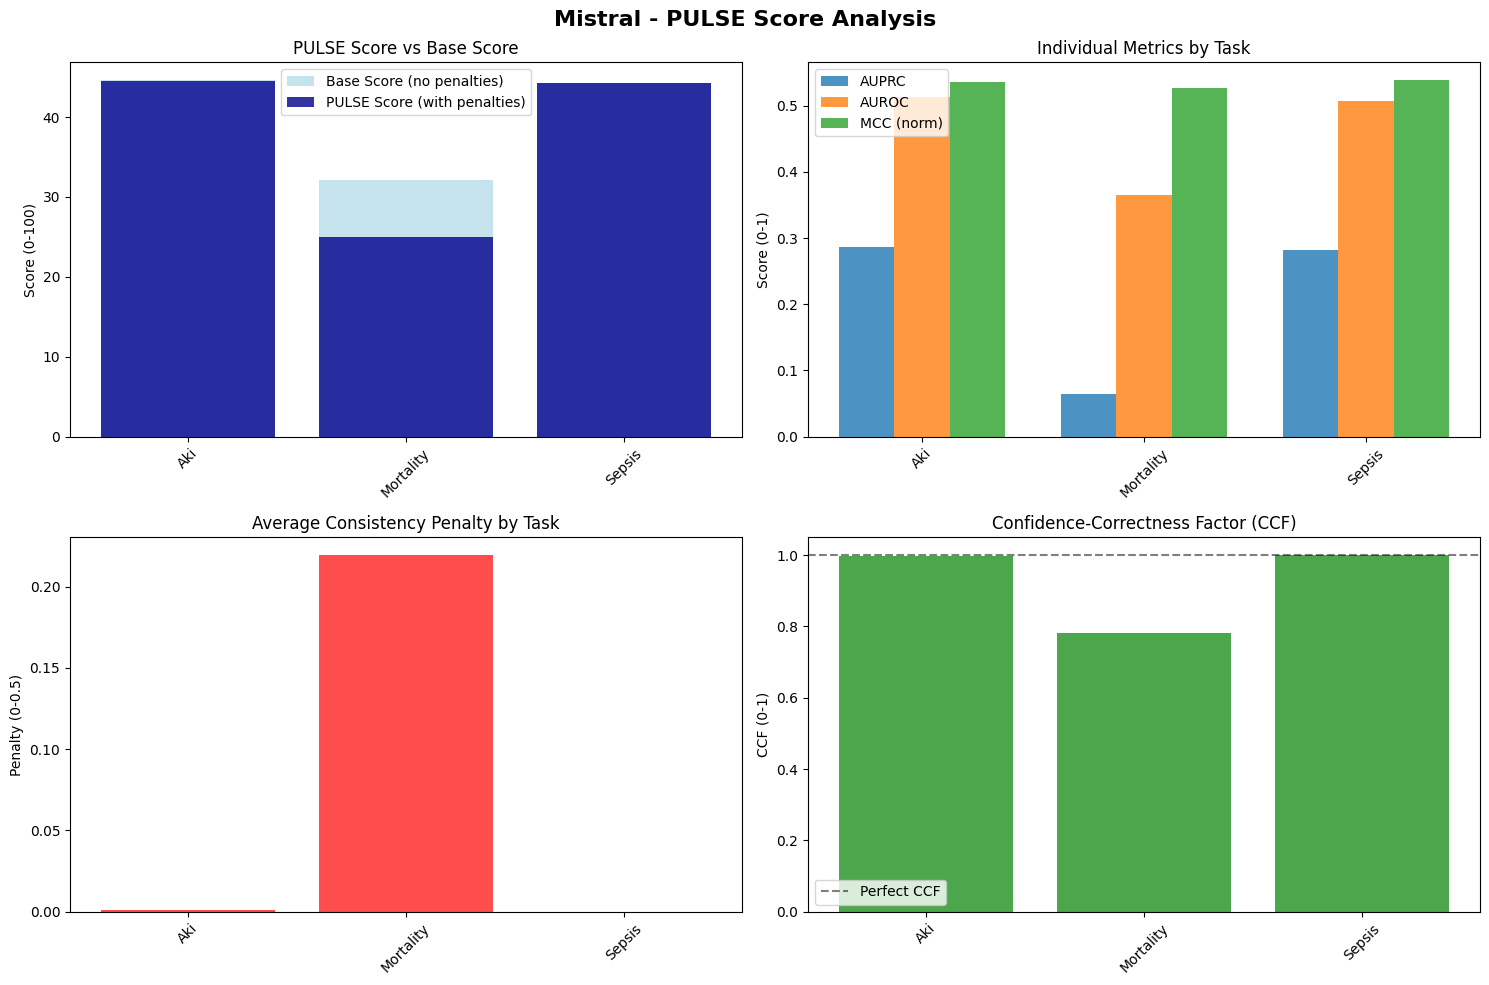

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 37.97/100
📈 Performance Category: Poor performance with significant confidence problems

📊 AKI Analysis:
   • Base performance: 44.6/100
   • Final PULSE score: 44.6/100
   • Penalty impact: -0.1 points
   • Problematic predictions: 10 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 32.1/100
   • Final PULSE score: 25.0/100
   • Penalty impact: -7.0 points
   • Problematic predictions: 192 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 44.3/100
   • Final PULSE score: 44.3/100
   • Penalty impact: -0.0 points
   • Problematic predictions: 0 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -2.4 points per task
   • This indicates minimal issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 44.3/100
   • Mortality prediction: 25.0/100
   • Aki pred

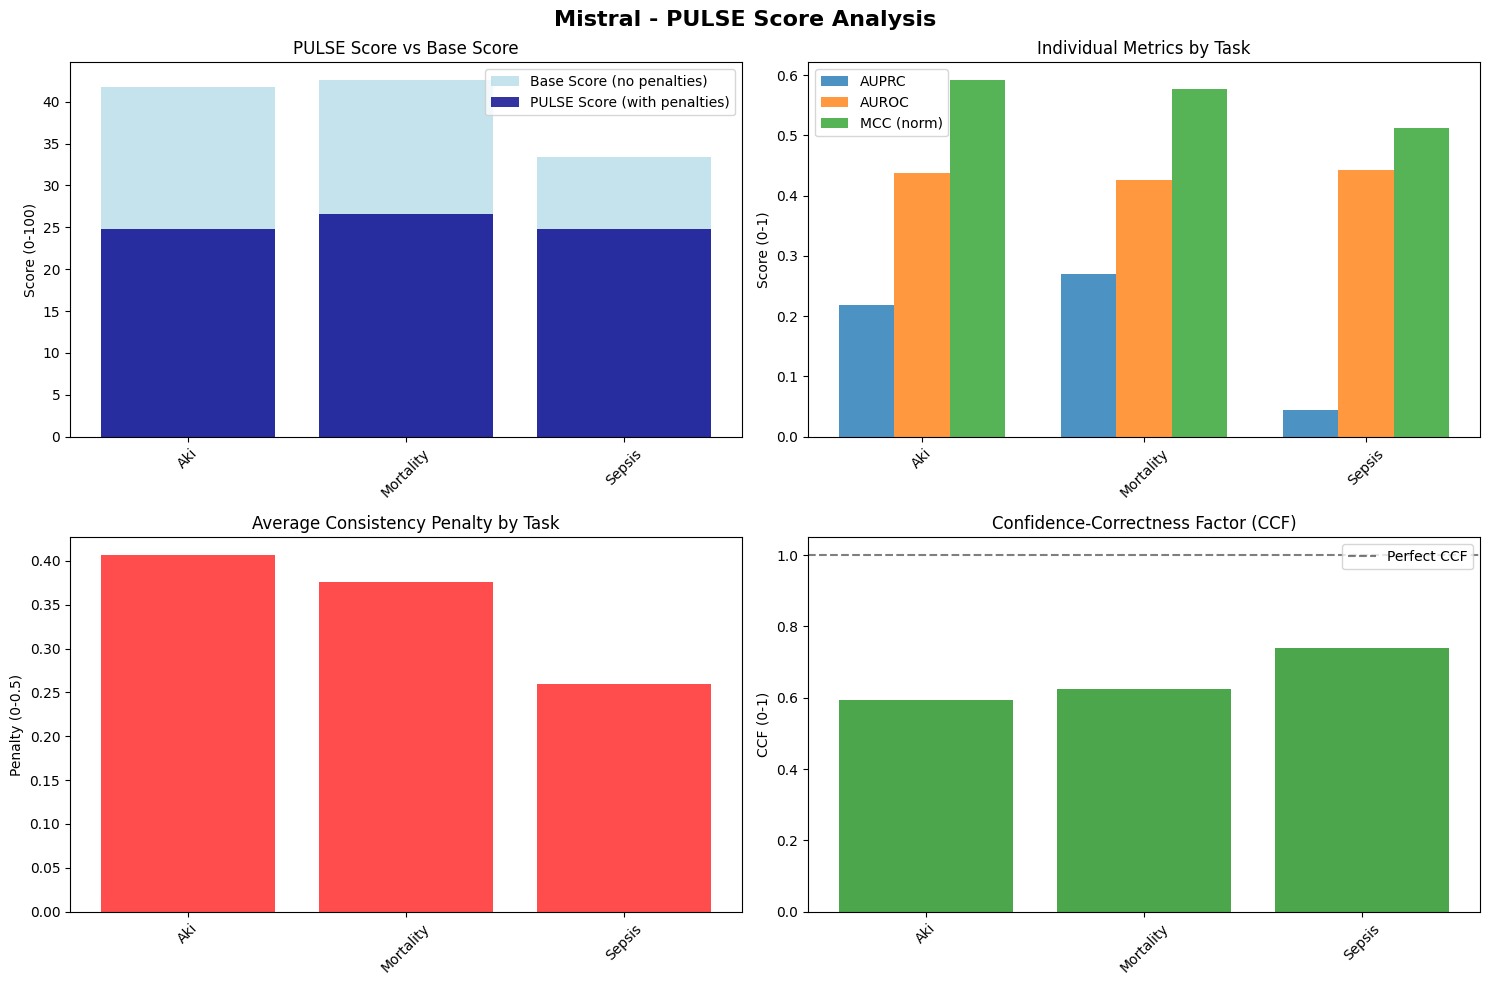

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 25.38/100
📈 Performance Category: Poor performance with significant confidence problems

📊 AKI Analysis:
   • Base performance: 41.8/100
   • Final PULSE score: 24.8/100
   • Penalty impact: -17.0 points
   • Problematic predictions: 2550 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 42.6/100
   • Final PULSE score: 26.6/100
   • Penalty impact: -16.0 points
   • Problematic predictions: 265 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 33.4/100
   • Final PULSE score: 24.8/100
   • Penalty impact: -8.7 points
   • Problematic predictions: 1707 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -13.9 points per task
   • This indicates significant issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 24.8/100
   • Mortality prediction: 26.6/100
 

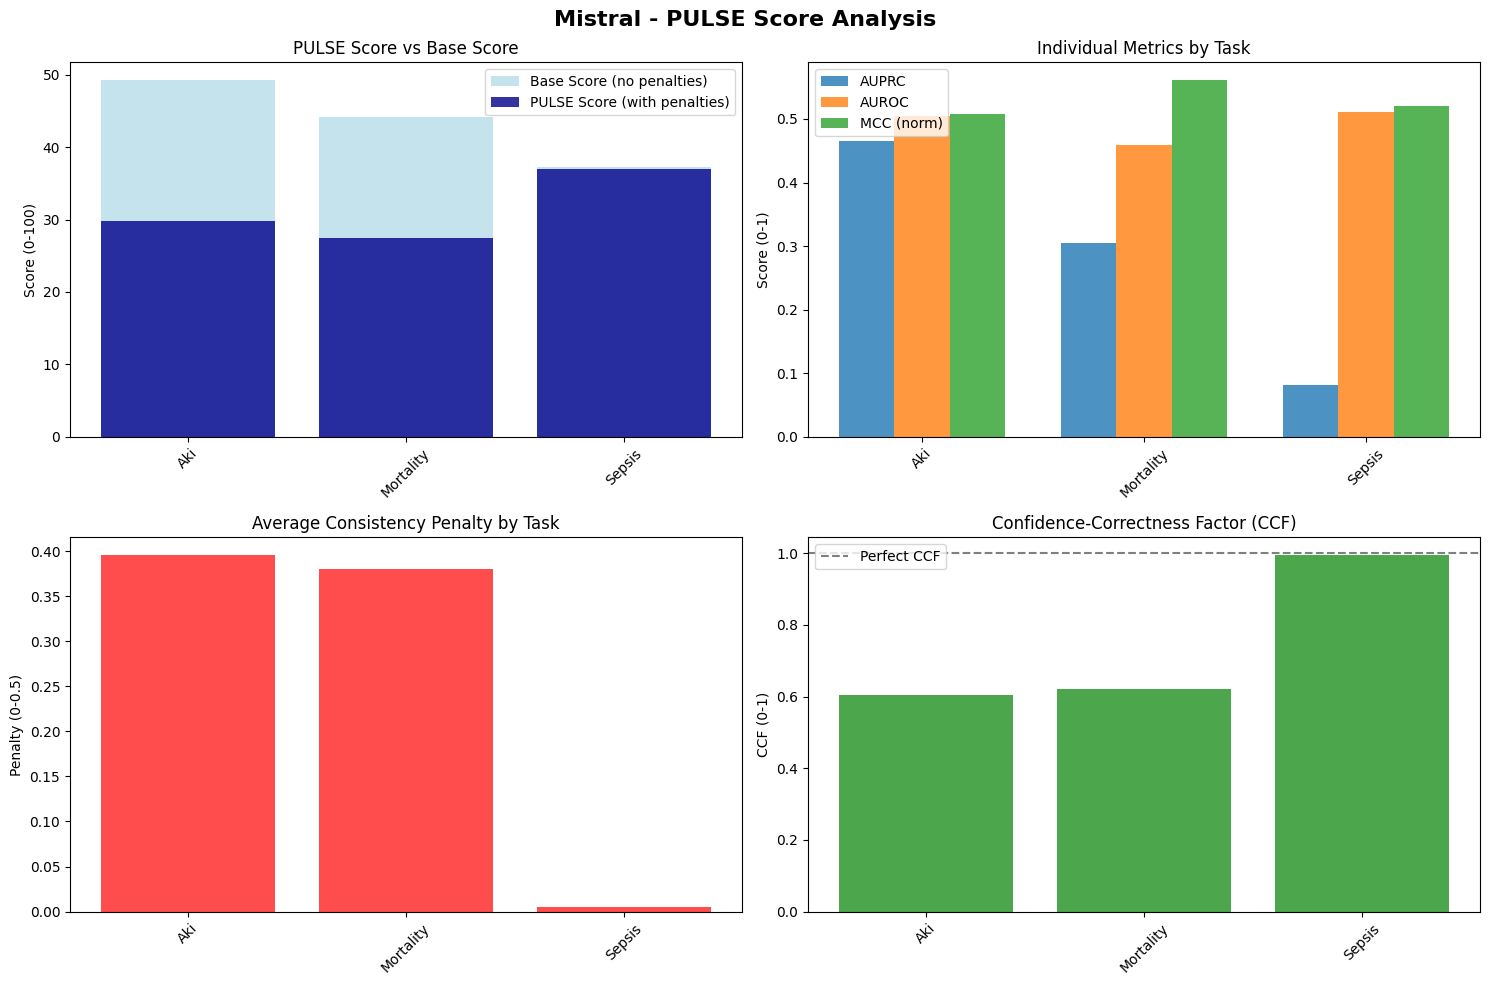

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 31.42/100
📈 Performance Category: Poor performance with significant confidence problems

📊 AKI Analysis:
   • Base performance: 49.3/100
   • Final PULSE score: 29.8/100
   • Penalty impact: -19.5 points
   • Problematic predictions: 2440 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 44.2/100
   • Final PULSE score: 27.4/100
   • Penalty impact: -16.8 points
   • Problematic predictions: 272 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 37.2/100
   • Final PULSE score: 37.0/100
   • Penalty impact: -0.2 points
   • Problematic predictions: 33 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -12.2 points per task
   • This indicates significant issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 37.0/100
   • Mortality prediction: 27.4/100
   

In [3]:
from src.eval.pulse_score import PULSEScoreCalculator

best_prompt_approach = None

for prompt_approach in prompt_approaches:
    if not os.path.isdir(os.path.join(base_output_dir, prompt_approach)):
        continue
    print(f"Processing {prompt_approach}...")
    cat_files = LLMAnalyzer.categorize_files(
        [os.path.join(base_output_dir, prompt_approach)],
        verbose=False,
    )
    df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
    ps = PULSEScoreCalculator()
    pulse_score = ps.calculate_pulse_score_from_raw_data(
        df=df_mdata,
    )
    pulse_score = pulse_score["overall"]["pulse_score"]

    if best_prompt_approach is None or pulse_score > best_prompt_approach[1]:
        best_prompt_approach = (prompt_approach, pulse_score)

print(
    f"Best prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
)

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


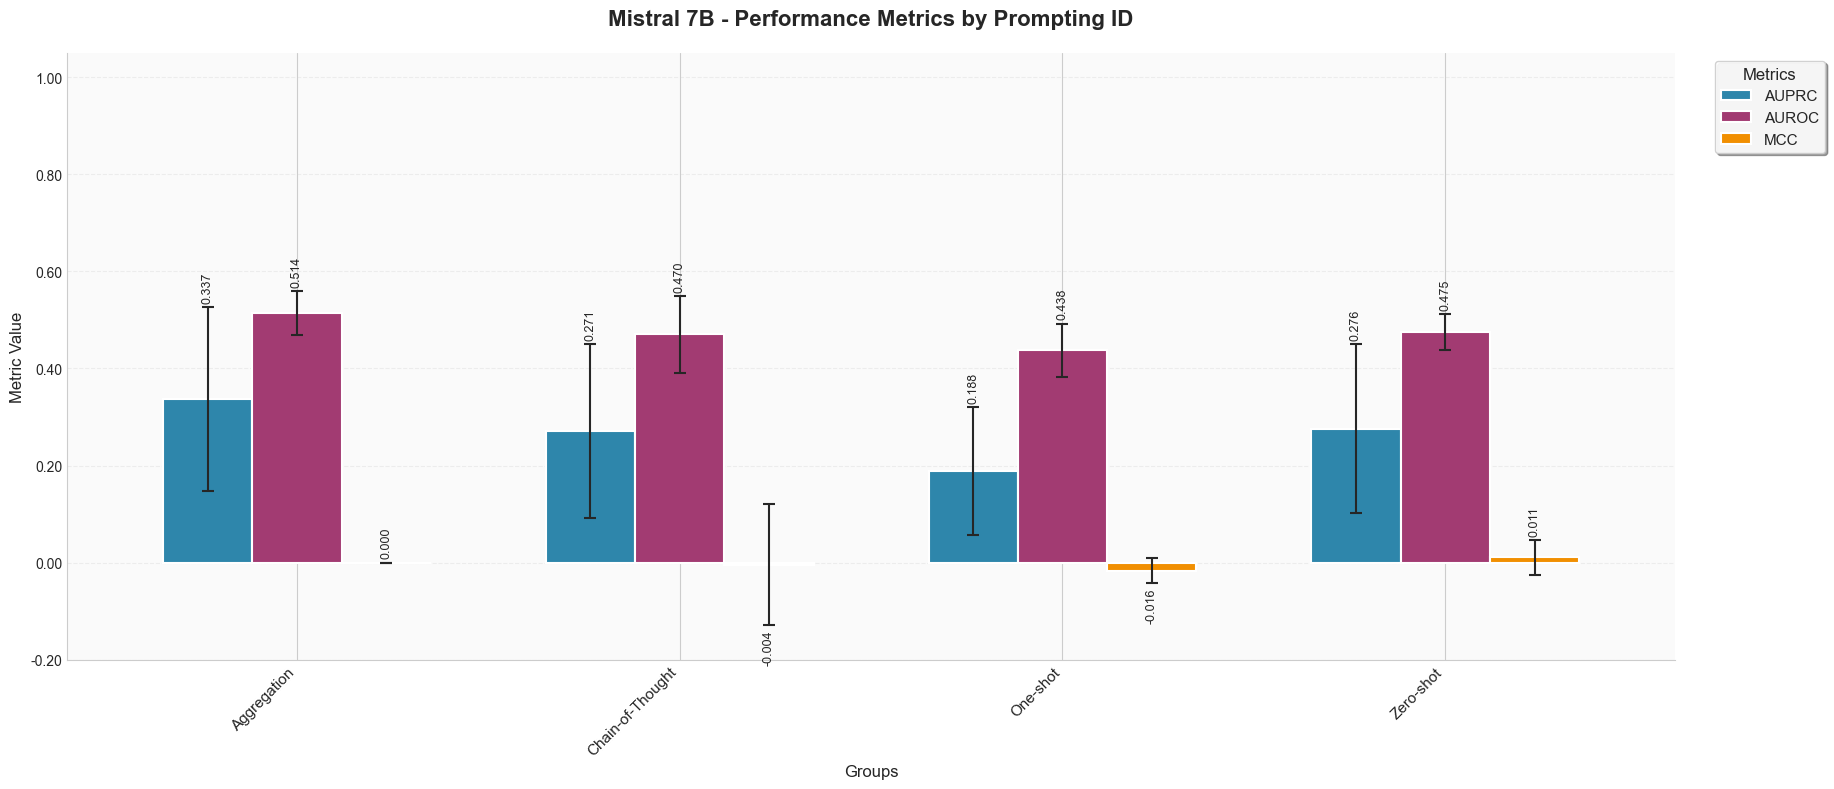

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Mistral 7B - "
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


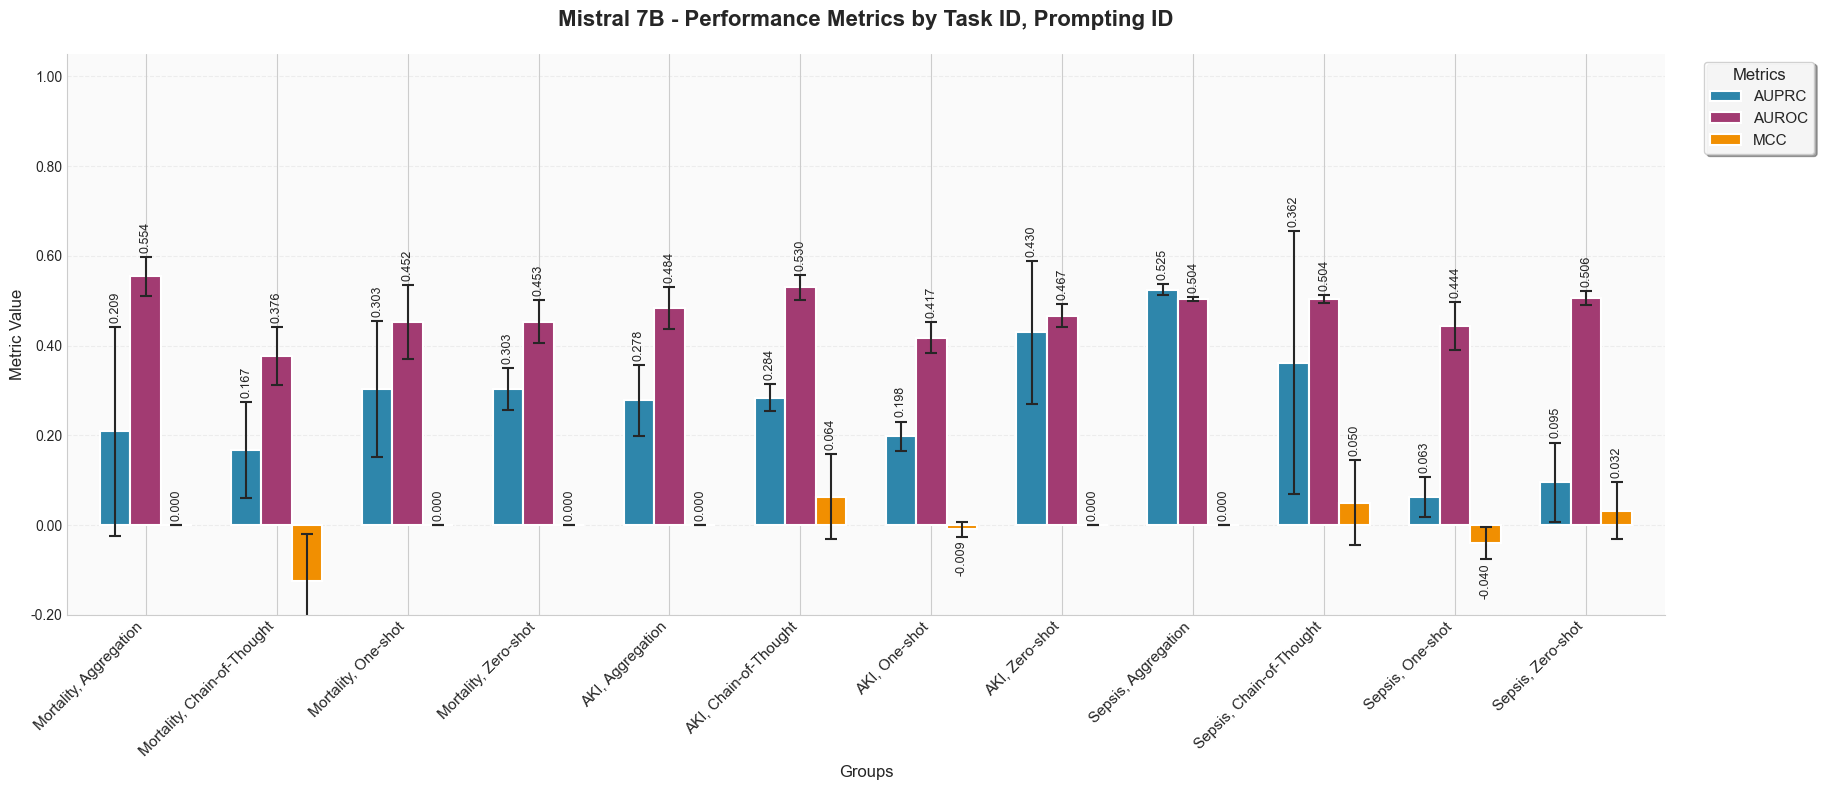

In [6]:
LLMAnalyzer.plot_metrics(
    df_results, group=["task_id", "prompting_id"], title_prefix="Mistral 7B - "
)

In [7]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [8]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=prompt_approaches[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('sarvari_aggregation', 'zhu_2024a_cot', 'zhu_2024b_one_shot'…

In [9]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\mistral7b\sarvari_aggregation
Model Name: Mistral, Task: aki, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: miiv, Timestamp: 20250623_184546


Preparing data for Mistral PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
✓ Required columns present: True
✓ Target Label is binary: True
✓ Predicted Diagnosis is binary: True
✓ Predicted Probability in [0,1]: True
✓ No invalid predictions detected

✅ Data format is correct for PULSE calculation!

Data distribution by task:

AKI:
  Total samples: 2950
  Positive labels: 693
  Valid predictions: 2950
  Positive predictions: 523.0
  Probability range: [0.700, 0.990]
  Probability mean: 0.918

MORTALITY:
  Total samples: 300
  Positive labels: 30
  Valid predictions: 300
  Positive predictions: 279.0
  Probability range: [0.600, 0.950]
  Probability mean: 0.810

SEPSIS:
  Total samples: 2939
  Positive labels: 145
  Valid predictions: 2939
  Positive predictions: 0.0
  Probability range: [0.900, 0.980]
  Probability mean: 0.979

Data types and unique values:
  Target Label: int64, values: [0 1]
  Predicted Diagnosis: float64, values: [0. 1.]
  Predicted Proba

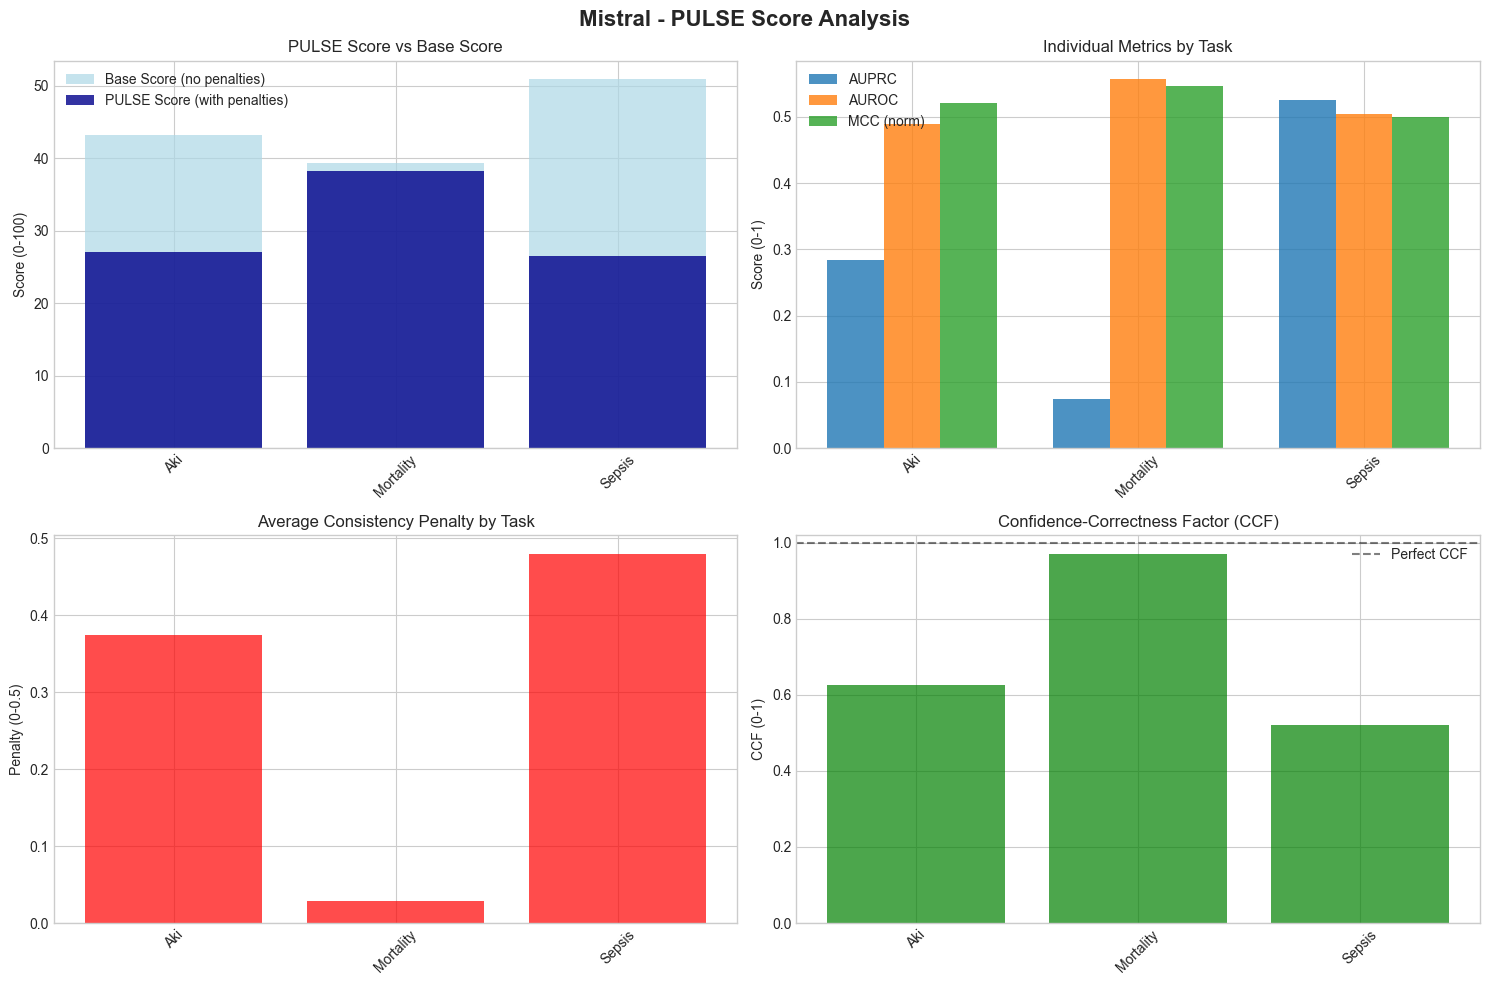

🔍 KEY INSIGHTS - PULSE SCORE ANALYSIS
🎯 FINAL PULSE SCORE: 30.61/100
📈 Performance Category: Poor performance with significant confidence problems

📊 AKI Analysis:
   • Base performance: 43.2/100
   • Final PULSE score: 27.1/100
   • Penalty impact: -16.2 points
   • Problematic predictions: 2427 (inconsistent or invalid)

📊 MORTALITY Analysis:
   • Base performance: 39.4/100
   • Final PULSE score: 38.2/100
   • Penalty impact: -1.1 points
   • Problematic predictions: 21 (inconsistent or invalid)

📊 SEPSIS Analysis:
   • Base performance: 51.0/100
   • Final PULSE score: 26.5/100
   • Penalty impact: -24.4 points
   • Problematic predictions: 2939 (inconsistent or invalid)

⚠️  PREDICTION QUALITY:
   • Average penalty impact: -13.9 points per task
   • This indicates significant issues with prediction quality
   • Issues include: confidence-prediction inconsistency & invalid task understanding

🔬 CLINICAL IMPACT:
   • Sepsis prediction: 26.5/100
   • Mortality prediction: 38.2/100
  

In [10]:
from src.eval.pulse_score import PULSEScoreCalculator

ps = PULSEScoreCalculator(
    is_llm_model=True,  # This is an LLM model
)

pulse_results = ps.calculate_pulse_score_from_raw_data(
    df=df_mdata,
    model_name="Deepseek-R1-Llama 8B",
)

In [11]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,2.38s,2337.84s,2406,2367447,94,92062,305,679,984,0.45
1,aki,hirid,2.42s,2379.37s,2410,2366296,96,94231,159,823,982,0.19
2,aki,miiv,2.41s,2375.71s,2409,2370549,96,94046,229,755,984,0.30
3,mortality,eicu,3.73s,372.63s,2389,238907,150,14972,7,93,100,0.08
4,mortality,hirid,3.82s,381.70s,2394,239384,155,15499,11,89,100,0.12
5,mortality,miiv,3.73s,372.94s,2393,239266,152,15152,12,88,100,0.14
6,sepsis,eicu,3.14s,3078.51s,2447,2398066,127,124028,47,933,980,0.05
7,sepsis,hirid,3.00s,2902.79s,2452,2375602,120,116493,73,896,969,0.08
8,sepsis,miiv,3.08s,3053.13s,2450,2425059,124,122753,25,965,990,0.03


In [12]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,run_id,prompting_id,metrics_summary
0,Mistral,mortality,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.604, 'auprc': 0.065, '..."
1,Mistral,mortality,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.521, 'auprc': 0.477000..."
2,Mistral,mortality,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.538, 'auprc': 0.085, '..."
3,Mistral,aki,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.47900000000000004, 'au..."
4,Mistral,aki,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.532, 'auprc': 0.21, 'n..."
5,Mistral,aki,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.44, 'auprc': 0.258, 'n..."
6,Mistral,sepsis,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.503, 'auprc': 0.524, '..."
7,Mistral,sepsis,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.509, 'auprc': 0.538, '..."
8,Mistral,sepsis,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.501, 'auprc': 0.513, '..."


In [13]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='eicu', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='hirid', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='mortality', dataset='miiv', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='eicu', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='hirid', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', task_id='aki', dataset='miiv', run_id='20250623_184546'
Updating existing record: model_id='Mistral'